<a href="https://colab.research.google.com/github/hadiwyne/movie-ranking-bias/blob/main/Rating_Inflation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing accuracy in Fandango's movie ratings

In this project, our goal is to determine whether there is bias in Fandango’s rating system. The inspiration for this project comes from a [journalistic piece](https://fivethirtyeight.com/features/fandango-movies-ratings/) by Walt Hickey from FiveThirtyEight that exposed Fandango's movie rating system was biased and dishonest in order to promote ticket sales.

Our job is to investigate whether there has been any change in Fandango's rating system since Walt Hickey's article.

## Understanding the Dataset

We have two datasets to go through:
- `fandango_score_comparison.csv`
- `movie_ratings_16_17.csv`

Let's go through each of these to see what we're dealing with

In [1]:
import pandas as pd

before = pd.read_csv("fandango_score_comparison.csv")
after = pd.read_csv("movie_ratings_16_17.csv")

The `before` dataset contains Fandango's rating prior to Walt Hickey's article. The `after` dataset contains Fandango's ratings after the article. Let's see if there has been any change in Fandango's rating system.

Now, let's inspect the head of these datasets.

In [3]:
before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


As we can see, there are many columns containing the ratings from many different rating websites, including Fandango. But because we are only interested in Fandango's rating, we will do away with the unecessary columns. But first, let's also investigate some summary statistics.

In [5]:
before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

A very small dataset but it'll work. Let's now investigate the `after` dataset.

In [4]:
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


This dataset is also pretty small, with fewer columns than the `before` dataset. We can confirm this by looking at the summary statistics.

In [6]:
after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie         214 non-null    object 
 1   year          214 non-null    int64  
 2   metascore     214 non-null    int64  
 3   imdb          214 non-null    float64
 4   tmeter        214 non-null    int64  
 5   audience      214 non-null    int64  
 6   fandango      214 non-null    float64
 7   n_metascore   214 non-null    float64
 8   n_imdb        214 non-null    float64
 9   n_tmeter      214 non-null    float64
 10  n_audience    214 non-null    float64
 11  nr_metascore  214 non-null    float64
 12  nr_imdb       214 non-null    float64
 13  nr_tmeter     214 non-null    float64
 14  nr_audience   214 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


Though this dataset has a lot more entries, it has fewer columns. In the next step, we will remove all the columns that we don't need for this project.

In [8]:
before = before[["FILM", "Fandango_Stars", "Fandango_Ratingvalue", "Fandango_votes", "Fandango_Difference"]].copy()
after = after[["movie", "year", "fandango"]].copy()

Instead of dropping the columns in the original dataset, we have created copies of the two datasets containing only the columns that are relevant for our analysis.

Let's see how our datasets look now.

In [9]:
before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [10]:
after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Now we can see that we only have Fandango related columns in our datasets.

Another thing of note is that while the `after` dataset contains a proper column for the `year` a `movie` was released in, in the `before` dataset we only see a `FILM` column, with the year of released mentioned inside this one column. To make things more streamlined, we need to make a similar `year` column for this dataset.

Let's use the `str` method to achieve this.

In [11]:
before['Year'] = before['FILM'].str[-5: -1]
before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


By using negative indexing, we've extracting the negative 5th element and the negative 1st element of the column, while avoiding the parenthesis. Our dataset remains the same, but we now have a new column, `Year`, with the release years extracted from the `FILM` column.

Our next step is to ensure whether our data is within the right date range to allow us to see whether Fandango has improved their rating system post-Walt's article. To do this, we will inspect years in the `before` dataset, and years in the `after` dataset.

Let's look at the value counts of the years.

In [12]:
before["Year"].value_counts()

,count
Year,
2015,129
2014,17


There are **129** movies in this dataset that released in 2015, and only **17** movies that released in 2014. We would want to remove this insignificant number as to keep our analysis restricted to the right year.

But there is an issue in the way we created this `Year` column. Remember we extracted the `Year` column from the `FILM` column using the `str` method. We essentially extracted a string from a string. We can even confirm this using the `dtypes` method:

In [14]:
before.dtypes

,0
FILM,object
Fandango_Stars,float64
Fandango_Ratingvalue,float64
Fandango_votes,int64
Fandango_Difference,float64
Year,object


Noting how the `Year` column is stored as an `object` data type. If we were to reference it as an `int`, Python would return an error. We could do the extra effort of converting it to an `int` type before referencing the `Year` column, but because that is not relevant to the analysis work that we're about to do, we'll use the easy way out.



In [15]:
fandango_2015 = before[before["Year"] == '2015'].copy()

fandango_2015["Year"].value_counts()

,count
Year,
2015,129


Using a filter, we have only pulled out the data that corresponds to the string `2015` in the `Year` column. Because this is a small dataset, this is okay to do.

Now, let's look at the years in the `after` dataset.



In [16]:
after["year"].value_counts()

,count
year,
2016,191
2017,23


Here, we have an additional year: `2017`. We are only interested in the films released in `2016` i.e. the year *after* Walt's article, so we will omit 2017 here. But because we did not extract the `year` column in this dataset from the `movie` column: a column containing string data type, our data types should show a different picture.

In [18]:
after.dtypes

,0
movie,object
year,int64
fandango,float64


Here, we can easily reference the year `2016` as an integer.

In [19]:
fandango_2016 = after[after["year"] == 2016].copy()
fandango_2016["year"].value_counts()

,count
year,
2016,191


#Data Visualization

Let's visualize the trends in our dataset. We will begin by importing the required libraries:



*   Since we are not using the whole of the numpy library, we have only imported one function called `arrange`
*   In addition to importing matplotlib.pyplot, we've also imported a dark background style

In [33]:
from numpy import arange
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

Now, we will render a KDP Kernel Density Plot. This plot will contain the star ratings from our two datasets.

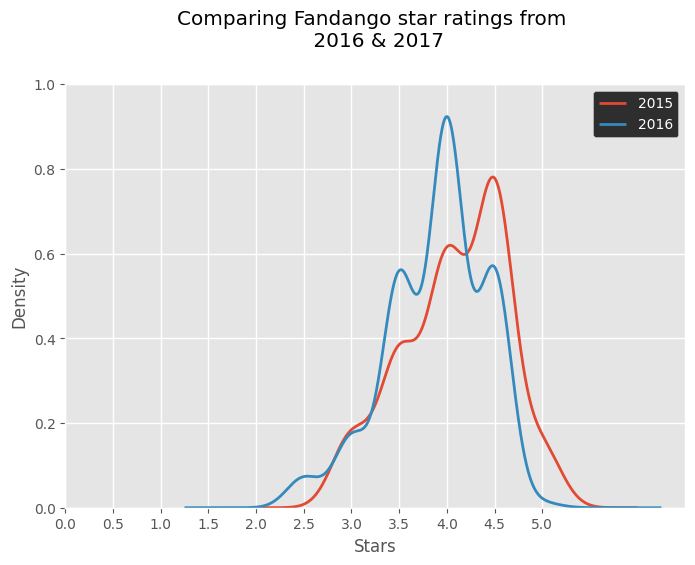

In [65]:
fandango_2015["Fandango_Stars"].plot.kde(label="2015", legend=True, figsize=(8,5.5))
fandango_2016["fandango"].plot.kde(label="2016", legend=True)

plt.title("Comparing Fandango star ratings from \n 2016 & 2017",
          y = 1.07, color = 'black')
plt.xlabel("Stars")
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('black')
plt.ylim(0.0, 1.0)
plt.xticks(arange(0, 5.1, 0.5))
plt.show()

You may notice something in this KDE: there are no dips in our dataset, as our dataset consists of ratings for a movie. This is just KDE struggling to understand the difference in ratings. But we can visually compare the difference between the rating trends between the two years.

We can also see that our representation is **left-skewed**. and the 2015 dataset is more left-skewed than 2016. We can see that more positive ratings are on right side of the chart, this KDE tells us 2 things:

1. In **2015**, movies were more frequently rated higher, with a large cluster around 4.5 stars. This proves inflation or bias in star ratings.

2. In **2016**, the ratings appear to have shifted downward slightly and spread out more. This shows an attempt by Fandango to correct for the rating inflation observed earlier.

Let's look at some frequencies to provide more concrete numbers to our visual. We will also normalize our numbers to get a good percentage.

In [49]:
print("2015" + '\n' + '-' * 16)
counts_2015 = fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100
print(counts_2015)

print("2016" + '\n' + '-' * 16)
counts_2016 = fandango_2016['fandango'].value_counts(normalize=True).sort_index()*100
print(counts_2016)

2015
----------------
Fandango_Stars
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: proportion, dtype: float64
2016
----------------
fandango
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: proportion, dtype: float64


Here, we have calculcated the percentage of how many times a star rating has appeared in a year. We can clearly see that the majority ratings of movies in the year **2015** was **4.5**, just as we saw in our KDE. However, in **2016**, the majority rating has dropped down to **4.0**.

Because the difference isn't exactly major, this could mean two things:
1. Fandango changed their rating style after being exposed by Walt's article
2. 2016 did not see that many good releases to warrant a high score.

Now, we will plot these percentages on a bar chart.

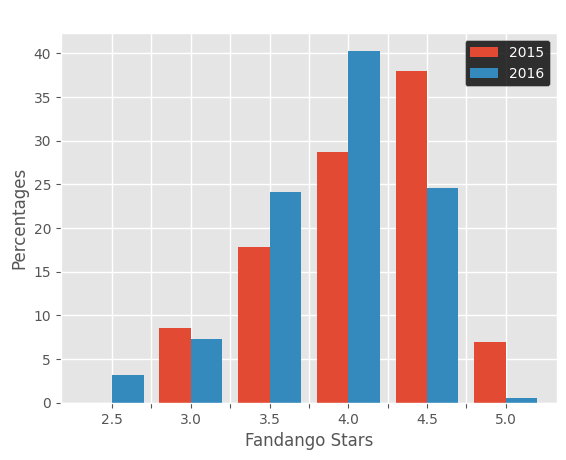

In [64]:
data = pd.DataFrame({'2015': counts_2015, '2016': counts_2016})

data.plot(kind='bar', width=0.8)

plt.xlabel("Fandango Stars")
plt.ylabel("Percentages")
plt.title("Comparing Fandango Ratings of 2016 & 2017")
plt.xticks(arange(0, 5.1, 0.5), rotation = 0)
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('black')
plt.show()

The bar chart shows us a similar trend. But we can go even deeper into our investigation by taking a look at the summary statistics of our dataset i.e. mean, median, and mode.

In [66]:
mean_2015 = fandango_2015["Fandango_Stars"].mean()
mean_2016 = fandango_2016["fandango"].mean()

median_2015 = fandango_2015["Fandango_Stars"].median()
median_2016 = fandango_2016["fandango"].median()

mode_2015 = fandango_2015["Fandango_Stars"].mode()[0]
mode_2016 = fandango_2016["fandango"].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


Here, we have created variables to store mean, median, and mode of each year. We then created a new Dataframe titled **summary** and stored all of these summaries into this new dataframe, with index **mean, median, and mode**, and column names **2015 and 2016**.

Now, let's plot these summaries.

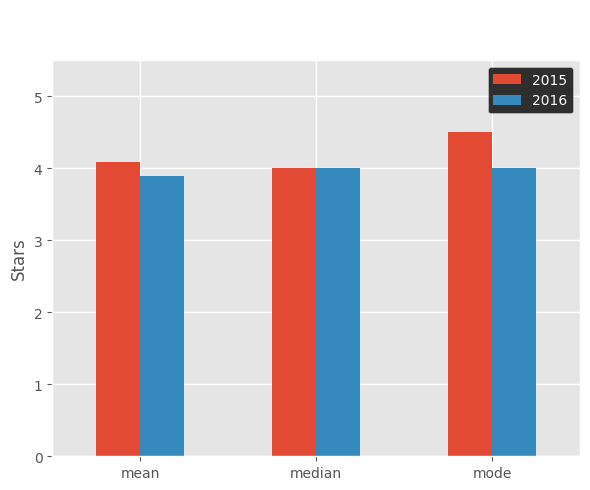

In [81]:
summary.plot(kind='bar', figsize=(6, 5))

plt.ylabel("Stars")
plt.title("Comparing statictics of ratings of 2016 & 2017", y = 1.07)
plt.ylim(0, 5.5)
plt.xticks(rotation=0)
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('black')
plt.tight_layout()
plt.show()

This bar chart tells us a couple of things:


**1. Mean (Average) Rating:**
- 2015: Higher than 2016
- 2016: Slightly lower
- This shows that, on average, Fandango movie ratings were inflated in 2015 compared to 2016.

**2. Median (Middle Value):**
- Equal in both years
- This suggests that the middle rating didn’t change, but the distribution around it did, becoming less skewed in 2016.

**3. Mode (Most Common Rating):**
- 2015: 4.5 stars (approx)
- 2016: 4.0 stars
- In 2015, the most frequent rating was very high, while in 2016 it dropped slightly, which may mean less bias toward high ratings.

The shift in mean and mode could somewhat support the idea that Fandango responded to criticism about rating inflation by making their ratings more accurate in 2016. But because there hasn't been a major change, we cannot decide that concretely.


Now, let's look at a comparison between Fandango's ratings and the ratings of another less biased and more popular rating website, like Rotten Tomatoes.

We will read our original dataset again, and make new copies to include our relevant columns. Since Rotten Tomatoes has a rating system ranging from numbers 1 - 100, our dataset contains a `RT_norm` column, which is the Rotten Tomatoes Tomatometer score for the film, normalized to a 0 to 5 point system. We will first compare RT score with Fandango's score in the year it was accused of manipulating its ratings.

In [91]:
rt = pd.read_csv("fandango_score_comparison.csv")
rt['Year'] = rt['FILM'].str[-5: -1]
rt = rt[rt["Year"] == '2015'].copy()
fandango = rt["Fandango_Stars"].copy()
rotten = rt["RT_norm"].copy()

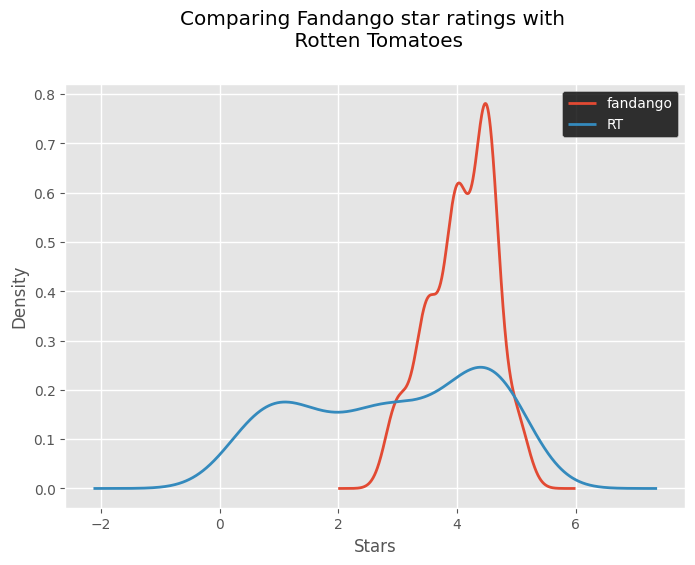

In [92]:
fandango.plot.kde(label="fandango", legend=True, figsize=(8,5.5))
rotten.plot.kde(label="RT", legend=True)

plt.title("Comparing Fandango star ratings with \n Rotten Tomatoes",
          y = 1.07, color = 'black')
plt.xlabel("Stars")
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('black')
plt.show()

As we can see, RT has a more balanced score, whereas Fandango's rating is very unbalanced.

We can even do the same operation in our 2016 dataset to see whether Fandango's rating system has improved, when compared to RT's 2016 score. Our 2016 dataset contains a column titled `n_tmeter`, which is the tomatometer normalized to a 0-5 scale.

In [93]:
new_year = pd.read_csv("movie_ratings_16_17.csv")
new_year = new_year[new_year["year"] == 2016].copy()

fan_2016 = new_year["fandango"].copy()
rt_2016 = new_year["n_tmeter"].copy()

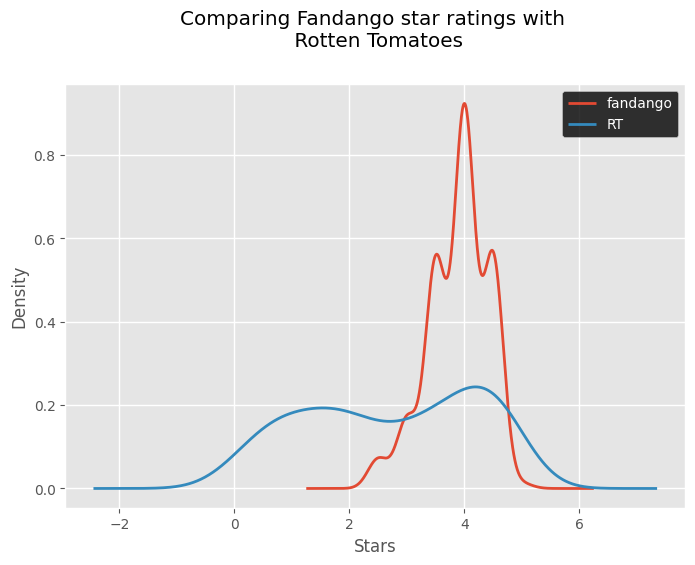

In [94]:
fan_2016.plot.kde(label="fandango", legend=True, figsize=(8,5.5))
rt_2016.plot.kde(label="RT", legend=True)

plt.title("Comparing Fandango star ratings with \n Rotten Tomatoes",
          y = 1.07, color = 'black')
plt.xlabel("Stars")
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('black')
plt.show()

We can see that even though Fandango's metric has significantly improved from 2015, they are still not a good measure of objective movie rating when compared to RT.